# EXPLORATORY DATA ANALYSIS

In [23]:
#IMPORTS LIBRARIES FOR MY ANALYSIS 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
import statsmodels.api as sm
import plotly.express as px


from plotly.offline import iplot, init_notebook_mode
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

init_notebook_mode(connected=True) 


In [24]:
#LOADING OUR PROVIDED INSURANCE DATASET 
insure = pd.read_csv("insurance.csv") 

In [25]:
# TELLS US HOW MANY ROWS AND COLUMNS THERE ARE IN THE DATASET 
insure.shape

(1338, 7)

In [26]:
# GIVE US A SUMMARY OF THE STRUCTURE OF THE DATASET 
insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
# CHECKS TO SEE IF THERE ARE ANY NULL VALUES IN THE DATASET
insure.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [28]:
# TELLS US HOW MANY DUPLICATE ROWS THERE ARE IN THE DATASET 
print("Duplicate Rows: ")
print(insure.duplicated().sum())

Duplicate Rows: 
1


In [29]:
# REMOVES THE DUPLICATE ROWS 
insure = insure.drop_duplicates()

In [30]:
# CONFIRMS THAT THE ROW IS REMOVED
insure.shape

(1337, 7)

In [31]:
# SHOWS US THE FIRST TEN ROWS OF THE DATASET TO VERIFY THE STRUCTURE 
insure.head(10)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

In [32]:
# SWITCHES CATEGORICAL DATA TO CONTINUOUS DATA 
labelEnc = LabelEncoder()
insure['sex'] = labelEnc.fit_transform(insure['sex'])
insure['smoker'] = labelEnc.fit_transform(insure['smoker'])
insure['region'] = labelEnc.fit_transform(insure['region'])

In [33]:
# CONFIRMING THAT THE ENCODING WORKED
insure.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 67.9 KB


In [34]:
# CHECKING TO SEE IF THE STRUCTURE OF THE DATASET HAS CHANGED ACCORDINGLY
insure.head(10)

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520
5   31    0  25.740         0       0       2   3756.62160
6   46    0  33.440         1       0       2   8240.58960
7   37    0  27.740         3       0       1   7281.50560
8   37    1  29.830         2       0       0   6406.41070
9   60    0  25.840         0       0       1  28923.13692

In [35]:
# DESCRIBES THE DATASET ACCORDING TO STATISTICS FOR THE NUMERICAL COLUMNS
insure.describe()

age          sex          bmi     children       smoker  \
count  1337.000000  1337.000000  1337.000000  1337.000000  1337.000000   
mean     39.222139     0.504862    30.663452     1.095737     0.204936   
std      14.044333     0.500163     6.100468     1.205571     0.403806   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.290000     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.700000     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1337.000000   1337.000000  
mean      1.516081  13279.121487  
std       1.105208  12110.359656  
min       0.000000   1121.873900  
25%       1.000000   4746.344000  
50%       2.000000   9386.161300  
75%       2.000000  16657.717450  
max       3.000000  63770.428010

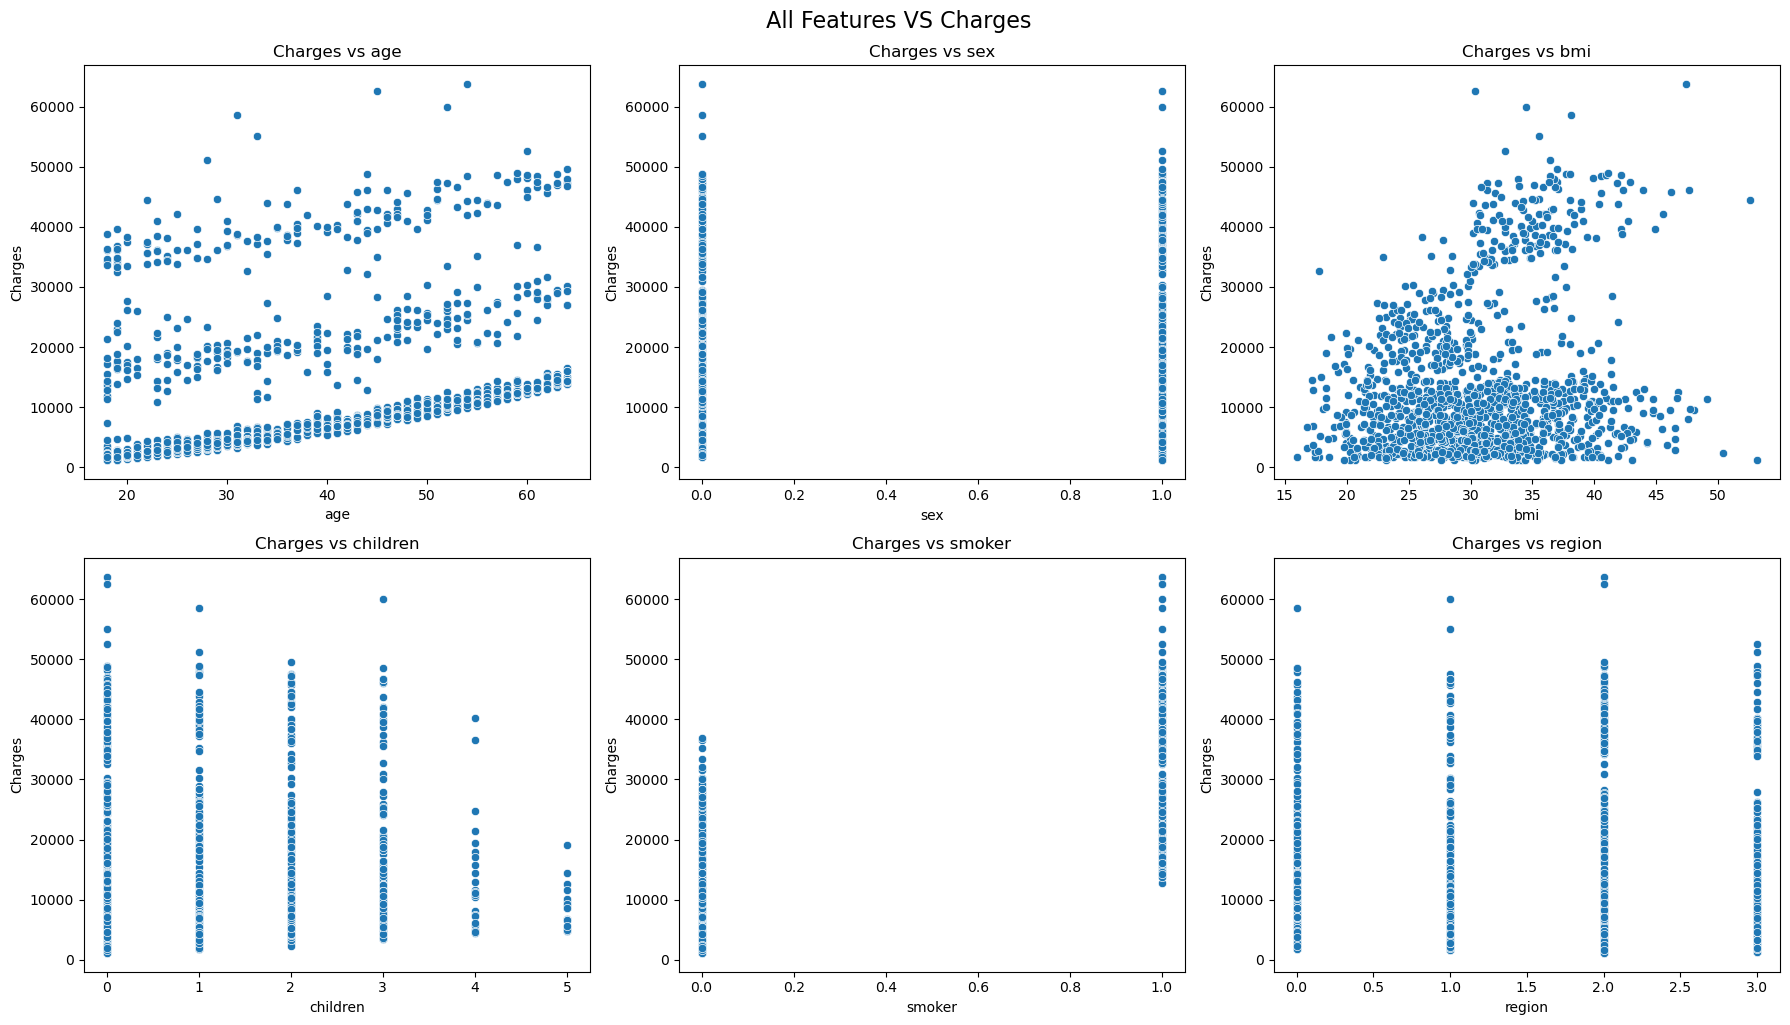

In [36]:
# DEFINING OUR x VARIABLES
x_vars = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# SUBPLOTS ARE BEING SET 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# LOOPING THROUGH THE VARIABLES AND PLOTTING EACH FEATURE AGAINST charges
for i, var in enumerate(x_vars):
    sb.scatterplot(data=insure, x=var, y='charges', ax=axes[i])
    axes[i].set_title(f'Charges vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Charges')

# PLOTTING 
plt.tight_layout()
plt.suptitle(" All Features VS Charges", fontsize=16, y=1.02)
plt.show()

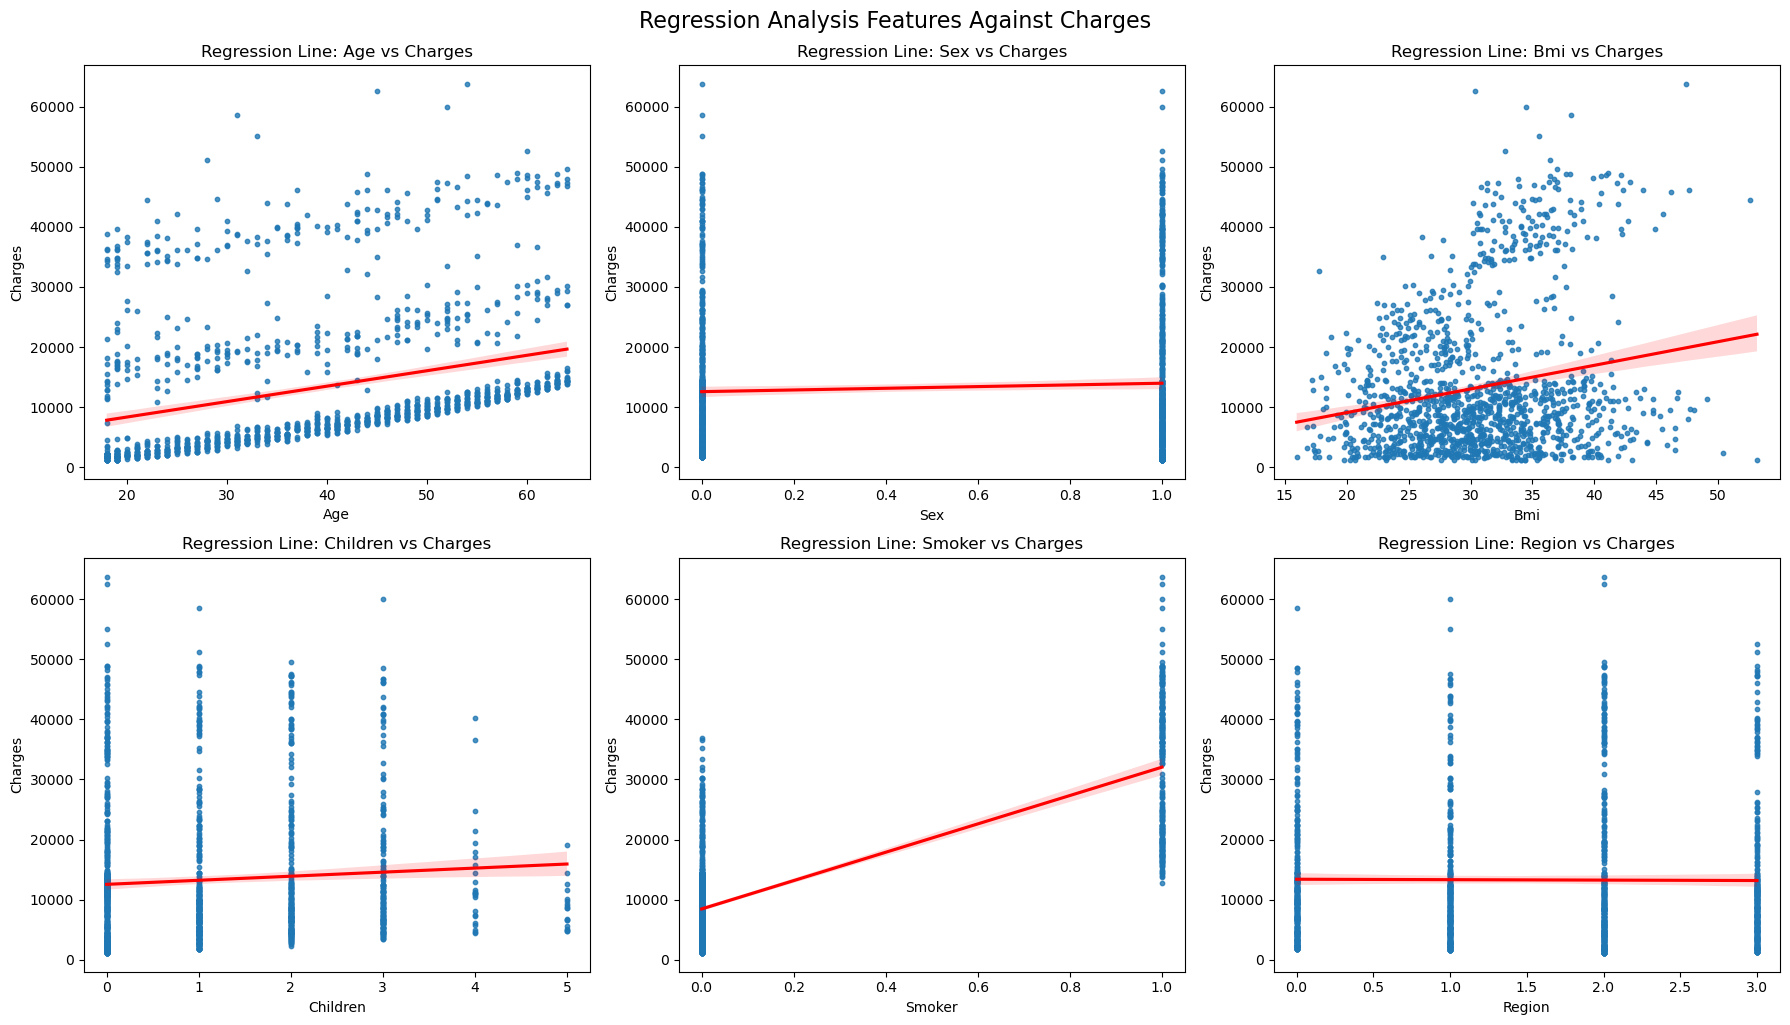

In [37]:
# SETTING THE SUBOLOTS 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# THESE ARE THE VARIABLES THAT WILL BE PLOTTED 
x_vars = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# THE VARIABLES WILL LOOP AND BE PLOTTED AGAINST CHARGES WITH A REGRESSION LINE BEING ADDED 
for i, var in enumerate(x_vars):
    sb.regplot(x=var, y='charges', data=insure, ax=axes[i], scatter_kws={'s': 10}, line_kws={'color': 'red'})
    axes[i].set_title(f'Regression Line: {var.capitalize()} vs Charges')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Charges')

#PLOTTING
plt.tight_layout()
plt.suptitle("Regression Analysis Features Against Charges", fontsize=16, y=1.02)
plt.show()

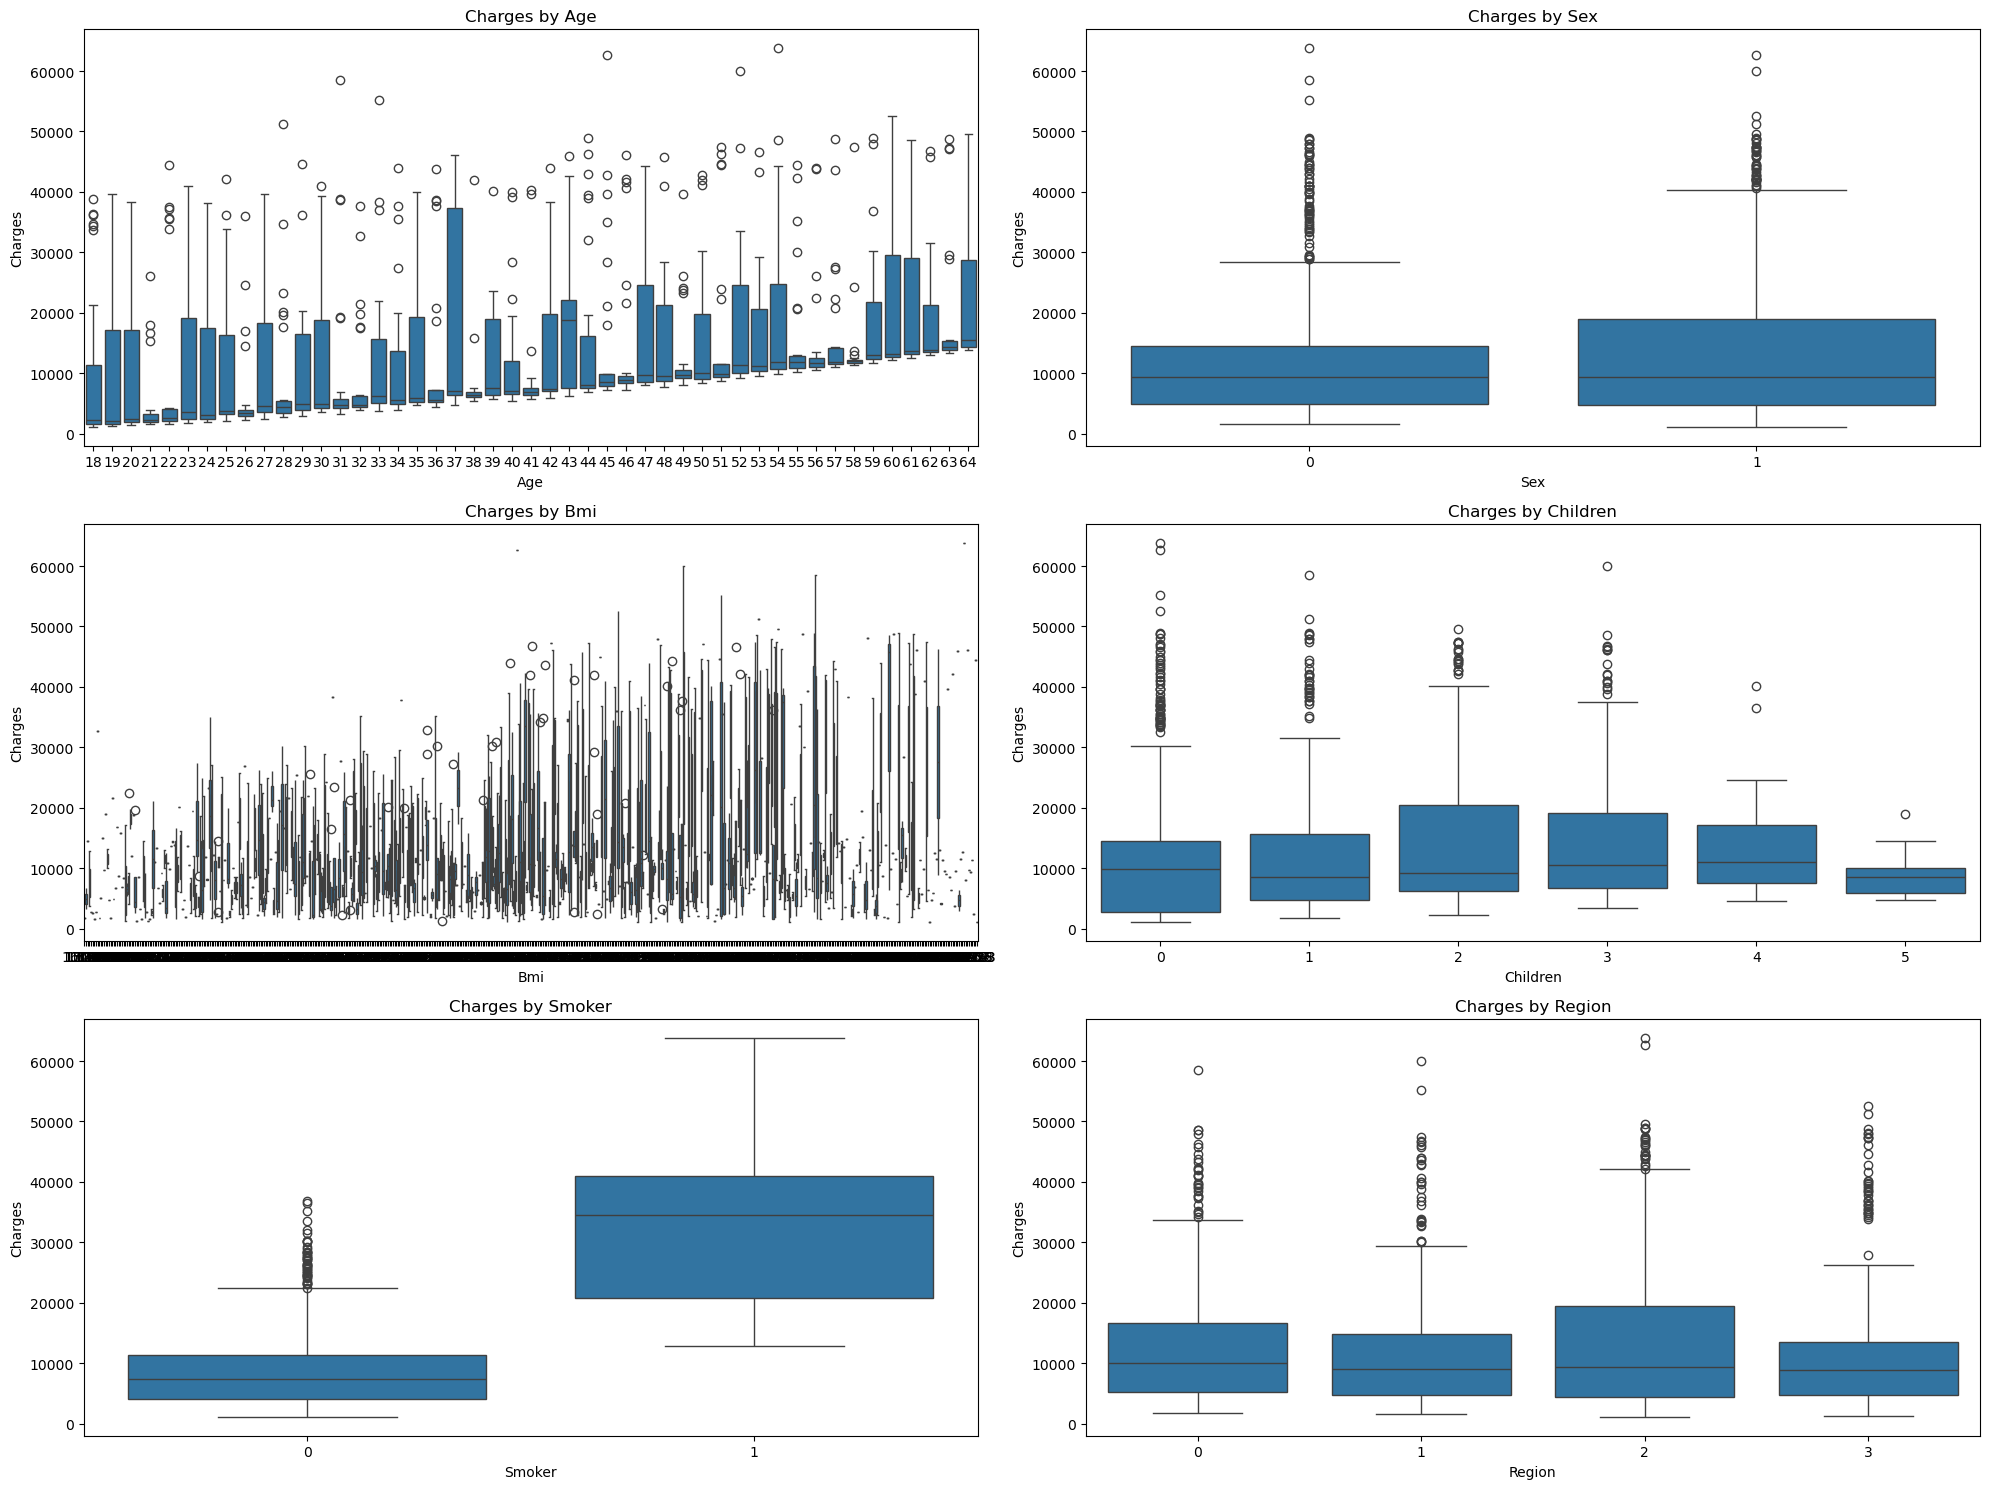

In [38]:
# Region: North west = 0  ,Southeast = 1, Southwest = 2, North east = 3
# Set the overall figure size
plt.figure(figsize=(20, 15))

# List of features to compare against 'charges'
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# Loop over features and create individual subplots
for i, feature in enumerate(features, start=1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns, position i
    sb.boxplot(data=insure, x=feature, y='charges')  # Basic boxplot
    plt.title(f'Charges by {feature.title()}')
    plt.xlabel(feature.title())
    plt.ylabel('Charges')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the full set of boxplots
plt.show()


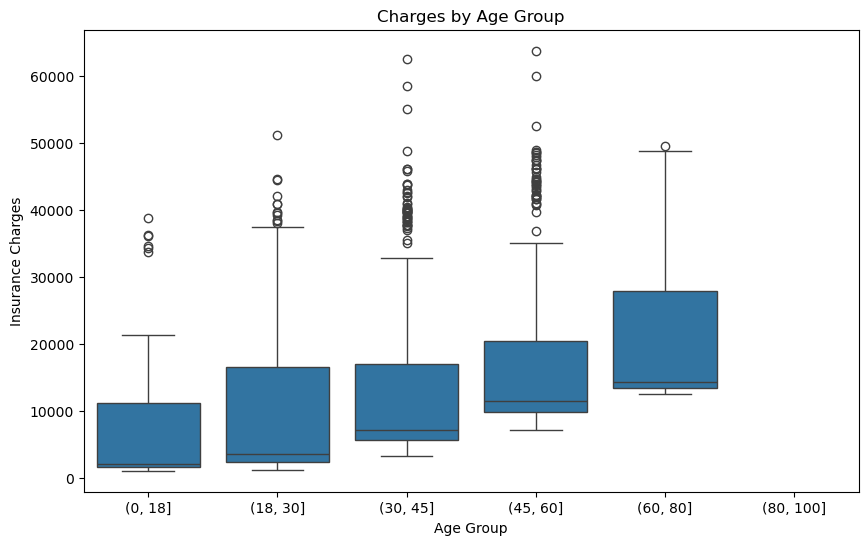

In [39]:
# CREATED AN 'age_group' COLUMN BECAUSE I COULD NOT READ THE AGES CLEARLY 
# SAME GRAPH AS ABOVE BUT GROUPED 

bins = [0, 18, 30, 45, 60, 80, 100]  # Age brackets
labels = ['Child', 'Young Adult', 'Adult', 'Middle Age', 'Senior', 'Elderly']

insure['age_group'] = pd.cut(insure['age'], bins, labels)
plt.figure(figsize=(10, 6))
sb.boxplot(x='age_group', y='charges', data=insure)
plt.title("Charges by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Insurance Charges")
plt.show()

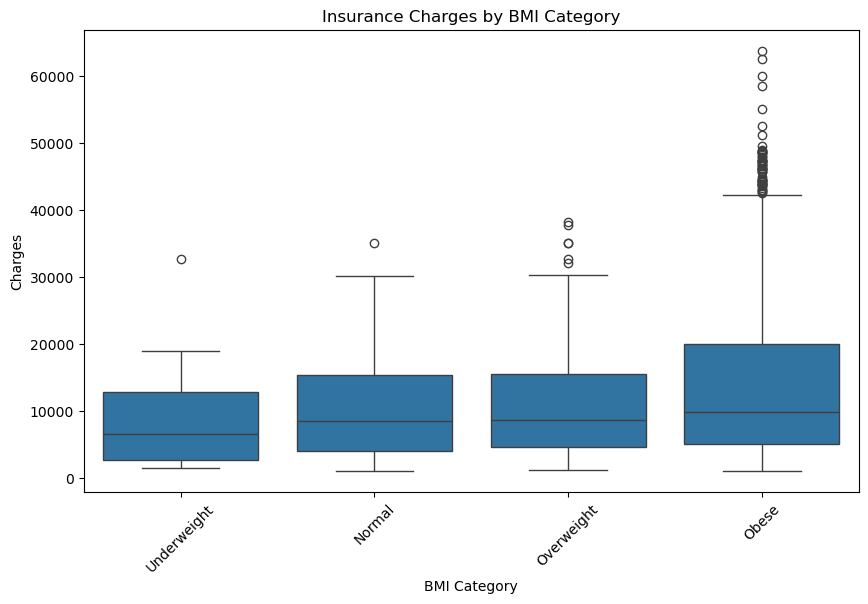

In [40]:
# CREATED AN 'bmi_group' COLUMN BECAUSE I COULD NOT READ THE BMI CLEARLY 
# SAME GRAPH AS ABOVE BUT GROUPED 
# 'Underweight (≤18.5)','Normal (18.6–24.9)','Overweight (25–29.9)','Obese Class I (30–34.9)',  'Obese Class II+ (≥35)'

bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 100]
bmi_labels = ['≤18.5','18.6–24.9','25–29.9','30–34.9','≥35']

insure['bmi_group'] = pd.cut(insure['bmi'], bins=[10, 18.5, 24.9, 29.9, 60], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# PLOTTING
plt.figure(figsize=(10, 6))
sb.boxplot(x='bmi_group', y='charges', data=insure)
plt.title("Insurance Charges by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Charges")
plt.xticks(rotation=45)
plt.show()

In [41]:
# DROPPING THE AADDED COLUMNS WE USED TO GROUP
insure.drop(columns=['bmi_group', 'age_group'], inplace=True)


In [42]:
# PROOF THAT IT WORKED
insure.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 67.9 KB


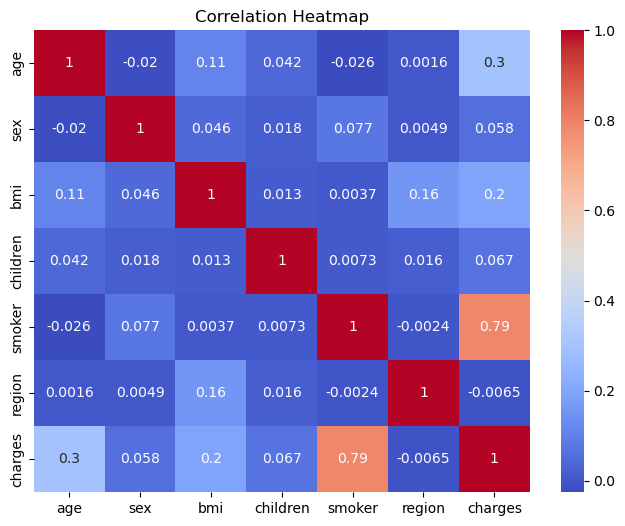

In [43]:
# CORRELATION HEATMAP 
plt.figure(figsize=(8,6))
sb.heatmap(insure.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [44]:
# FILTERS THE DATASET TO LOOK AT SMOKERS ONLY 
smokers = insure[insure['smoker'] == 1].copy()

# LABELS
smokers['gender'] = smokers['sex'].map({1: 'Male', 0: 'Female'})

# HOVERING
smokers['hover_info'] = (
    'Gender: ' + smokers['gender'] +
    '<br>Age: ' + smokers['age'].astype(str) +
    '<br>Charges: $' + smokers['charges'].astype(str)
)

# PLOTTING
fig = px.scatter(
    smokers,
    x='age',
    y='charges',
    color='gender',
    hover_name='hover_info',
    title='Charges by Age for Male and Female Smokers',
    labels={'age': 'Age', 'charges': 'Charges'},
    color_discrete_map={'Male': 'blue', 'Female': 'pink'}
)

fig.update_traces(marker=dict(size=10, line=dict(width=1)))
fig.update_layout(legend_title_text='Smoker Gender')
fig.show()

In [45]:
# FILTERS THE DATASET TO LOOK AT NON-SMOKERS ONLY 
non_smokers = insure[insure['smoker'] == 0].copy()

# LABELS
non_smokers['gender'] = non_smokers['sex'].map({1: 'Male', 0: 'Female'})

# HOVERING
non_smokers['hover_info'] = (
    'Gender: ' + non_smokers['gender'] +
    '<br>Age: ' + non_smokers['age'].astype(str) +
    '<br>Charges: $' + non_smokers['charges'].astype(str)
)

# PLOTTING
fig = px.scatter(
    non_smokers,
    x='age',
    y='charges',
    color='gender',
    hover_name='hover_info',
    title='Charges by Age for Male and Female Non-Smokers',
    labels={'age': 'Age', 'charges': 'Charges'},
    color_discrete_map={'Male': 'blue', 'Female': 'pink'}
)

fig.update_traces(marker=dict(size=10, line=dict(width=1)))
fig.update_layout(legend_title_text='Non-Smoker Gender')
fig.show()

# FEATURE SELECTION

In [46]:
# THESE ARE OUR TARGET VARIABLES, X IS ALL FEATURES EXCLUDING CHARGES AND Y IS CHARGES
X = insure.drop(columns=['charges'])  
y = insure['charges']  

In [47]:
# DEFINING THE MODEL
model = LinearRegression()

In [48]:
# Define RFE with the model
rfe = RFE(model, n_features_to_select=5)  
X_rfe = rfe.fit_transform(X, y)

In [49]:
# THESE ARE THE SELECTED TOP 5 FEATURES
selected_features = X.columns[rfe.support_]
print(f'Selected Features: {selected_features}')

Selected Features: Index(['age', 'bmi', 'children', 'smoker', 'region'], dtype='object')


# TRAIN MODEL

In [50]:
# TEST AND TRAINING DATA SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# FITTING THE LASSO MODEL
lasso = Lasso(alpha=0.01) 
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [52]:
# Get the coefficients
coef = lasso.coef_

In [53]:
# GIVES US THE FEATURES THAT HAVE NON-ZERO COEFFICIENTS
selected_features_lasso = X.columns[coef != 0]
print(f'Selected Features (Lasso): {selected_features_lasso}')

Selected Features (Lasso): Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [54]:
# ADDING A CONSTANT 
X_with_intercept = sm.add_constant(X)

# FITTING THE MODEL 
ols_model = sm.OLS(y, X_with_intercept).fit()

# GETTING OUR P VALUE 
p_values = ols_model.pvalues

In [55]:
# EACH FEATURE HAS A P HAVLUE WHICH IS DISPLAYED BELOW
print(p_values)

const       2.718249e-33
age         4.780908e-89
sex         6.976918e-01
bmi         1.534115e-31
children    5.251180e-04
smoker      0.000000e+00
region      2.000341e-02
dtype: float64


In [56]:
# ALL THE FEATURES WITH THE HIGH P VALUES WILL BE DROPPED 
selected_features_pvalue = p_values[p_values < 0.05].drop('const', errors='ignore').index
X_selected = X[selected_features_pvalue]
print(f'Selected Features (P-Value): {selected_features_pvalue}')

Selected Features (P-Value): Index(['age', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [57]:
# DATA IS SPLIT INTO TRAINING AND TEST DATA SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# THE PARAMETER GRIDS ARE SET UP FOR HYPERPARAMETER TUNING 
ridge_params = {'alpha': [0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.1, 1, 10, 100]}
elasticnet_params = {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}

In [59]:
# GRIDSEARCHCV IS SET UP FOR EACH MODEL
ridge_grid_search = GridSearchCV(Ridge(), ridge_params, cv=5)
lasso_grid_search = GridSearchCV(Lasso(), lasso_params, cv=5)
elasticnet_grid_search = GridSearchCV(ElasticNet(), elasticnet_params, cv=5)

In [60]:
# MODELS ARE NOW FIT TO THE TRAINING DATA 
ridge_grid_search.fit(X_train, y_train)
lasso_grid_search.fit(X_train, y_train)
elasticnet_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]})

In [61]:
# BEST PARAMATER AND SCORE FOR EACH MODEL ARE BEING DISPLAYED
print(f"Best parameters for Ridge Regression: {ridge_grid_search.best_params_}")
print(f"Best score for Ridge Regression: {ridge_grid_search.best_score_}")
print(f"Best parameters for Lasso Regression: {lasso_grid_search.best_params_}")
print(f"Best score for Lasso Regression: {lasso_grid_search.best_score_}")
print(f"Best parameters for ElasticNet Regression: {elasticnet_grid_search.best_params_}")
print(f"Best score for ElasticNet Regression: {elasticnet_grid_search.best_score_}")

Best parameters for Ridge Regression: {'alpha': 1}
Best score for Ridge Regression: 0.7259478282353793
Best parameters for Lasso Regression: {'alpha': 100}
Best score for Lasso Regression: 0.726068858048199
Best parameters for ElasticNet Regression: {'alpha': 0.1, 'l1_ratio': 0.9}
Best score for ElasticNet Regression: 0.7246378834736229


In [62]:
# CHOOSING A MODEL
best_model = ridge_grid_search.best_estimator_  # replace with the best model after evaluation


In [63]:
# TRAINING OUR CHOSEN MODEL 
best_model.fit(X_train, y_train)


Ridge(alpha=1)

In [64]:
# THE TRAINED MODEL WILL MAKE PREDICTIONS 
y_pred = best_model.predict(X_test)


# INTERPRET AND EVALUATE THE MODEL

In [ ]:
#REGRESSION MODEL METRICS
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

c:\Users\nande\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [66]:
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.8058993545084215
Mean Squared Error: 35667170.64336922
Root Mean Squared Error: 5972.199816095341


In [67]:
# MAKING PREDICTIONS
y_pred = best_model.predict(X_test)

In [68]:
# CALCULATING THE R SQUARED
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.8059


In [69]:
# CALCULATING THE MEAN SQUARED ERROR 
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 35667170.6434


In [70]:
# CALCULATING THE ROOT MEAN SQUARED ERROR 
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 5972.1998


In [71]:
# CALCULATING THE MEAN ABSOLUTE ERROR 
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 4198.2029


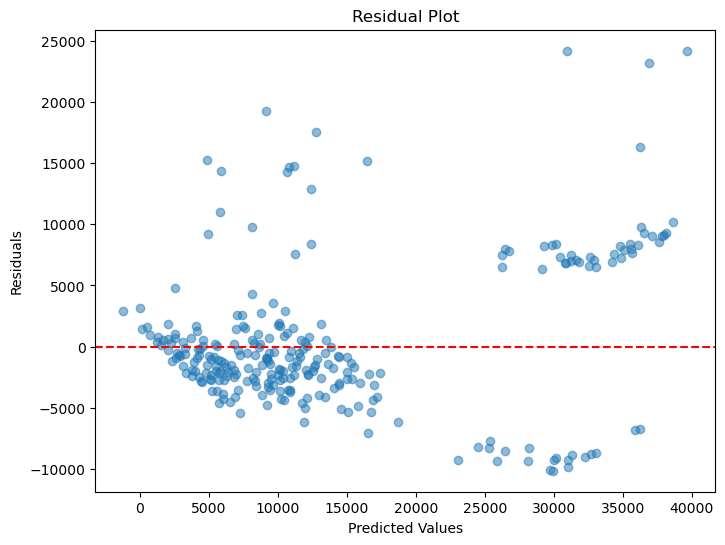

In [72]:
# LETS PLOT ALL OUR CALCULATIONS 
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [73]:
# USING MY INFO TO PREDICT 
myInfo = pd.DataFrame({
    'age': [22],
    'sex': [0],               # 1 = male, 0 = female
    'bmi': [23.87],
    'children': [0],
    'smoker': [0],            # 1 = smoker, 0 = non-smoker 
    'region': [2]      # southeast

})

# Predict charges
predicted_charge = best_model.predict(myInfo)

# Print the prediction
print(f"Your Predicted Insurance Charge: ${predicted_charge[0]:,.2f}")

Your Predicted Insurance Charge: $1,437.19
